In [68]:
from scipy.io import loadmat
from pprint import pprint
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
import torch
from tqdm import tqdm
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import pickle
from mpl_toolkits.mplot3d import Axes3D

In [3]:
path= "C:/Users/Charlotte/Dropbox/Bac_informatique/Automne 2020/Analyse geometrique des donnees/Chronic-Liver-Classification/"


with open(path + 'data/02_interim/bmodes_steatosis_assessment_IJCARS.pickle', 'rb') as handle:
    df = pickle.load(handle)

In [4]:
M, N= 434, 636 # ultrasound image dimension

In [34]:
#df['id']
#df['class']

In [5]:
# Reshape the data appropriately
data = df['img'].iloc[0].view(1,M,N)
for i in tqdm(range(1,len(df['img']))):
    data = torch.cat([data,df['img'].iloc[i].view(1,M,N)])

100%|████████████████████████████████████████| 549/549 [01:37<00:00,  2.82it/s]


In [178]:
def create_pca(data):
    reshaped_data = data.reshape(data.shape[0], -1)
    pca = PCA()
    pca.fit(reshaped_data)
    
    return pca

def create_cumul_var_graph(pca):
    ratio = pca.explained_variance_ratio_
    cumulative = np.cumsum(ratio)
    n_components = np.arange(0, len(cumulative))
    plt.plot(n_components, cumulative)
    plt.title("Cumulative Explained Variance by number of components")
    plt.ylabel("Cumulative Ratio")
    plt.xlabel("Number of components")
    

def create_3D_graph(data_3D, classes, ids):
    fig = plt.figure(figsize=plt.figaspect(2))
    
    #normal vs fatty
    normal = data_3D[df['class'] == 0]
    fatty = data_3D[df['class'] == 1]
    ax1 = fig.add_subplot(211, projection='3d')
    ax1.scatter(normal[:,0], normal[:,1], normal[:,2])
    ax1.scatter(fatty[:,0], fatty[:,1], fatty[:,2])
    ax1.title.set_text("Normal vs Fatty")
    
    #patient variance
    ax2 = fig.add_subplot(212, projection='3d')
    for i in range(55):
        data_i = data_3D[df['id'] == i]
        ax2.scatter(data_i[:,0], data_i[:,1], data_i[:,2])
        ax2.title.set_text("Patients Variance")
        
    return fig
    

def create_2D_graph(data_2D, classes, ids):
    fig = plt.figure(figsize=plt.figaspect(2))
    
    #normal vs fatty
    normal = data_3D[df['class'] == 0]
    fatty = data_3D[df['class'] == 1]
    ax1 = fig.add_subplot(211)
    ax1.scatter(normal[:,0], normal[:,1])
    ax1.scatter(fatty[:,0], fatty[:,1])
    ax1.title.set_text("Normal vs Fatty")
    
    #patient variance
    ax2 = fig.add_subplot(212)
    for i in range(55):
        data_i = data_3D[df['id'] == i]
        ax2.scatter(data_i[:,0], data_i[:,1])
        ax2.title.set_text("Patients Variance")
        
    return fig

In [179]:
pca = create_pca(data)
pca_data = pca.transform(data.reshape(data.shape[0], -1))


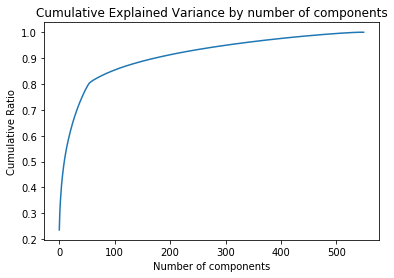

In [180]:
create_cumul_var_graph(pca)

In [181]:
pca_data = pca.transform(data.reshape(data.shape[0], -1))

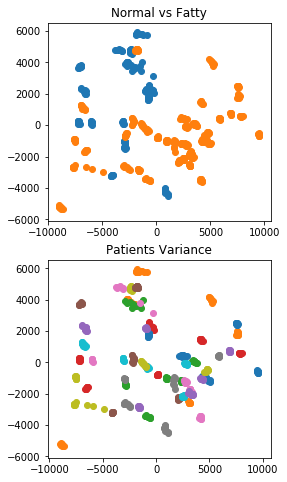

In [182]:
fig_2d = create_2D_graph(pca_data, df['class'], df['id'])

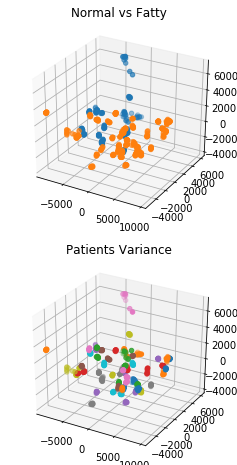

In [183]:
fig_3D = create_3D_graph(pca_data, df['class'], df['id'])